In [1]:
import pandas as pd
df = pd.read_csv("/content/fixed_csv.csv", low_memory=False)
print(df.columns)


Index(['JURISDICTION', 'REASON FOR STOP', 'PERSON TYPE', 'RACE', 'AGE',
       'GENDER', 'ENGLISH SPEAKING', 'ACTION TAKEN', 'PERSON SEARCHED',
       'VEHICLE SEARCHED', 'FORCE USED BY OFFICER', 'FORCE USED BY SUBJECT'],
      dtype='object')


In [2]:
print('AGE' in df.columns)
print(df['AGE'].unique())
print(df['AGE'].head(20))
print(df['AGE'].value_counts())

True
[28. 54. 30. 23. 22. 35. 19. 40. 33. 18. 50. 24. 55. 58. 38. 29. 46. 47.
 44. 42. 81. 20. 27. 63. 31. 21. 25. 62. 34. 80. 66. 39. 41. 61. 43. 36.
 37. 45. 68. 74. 53. 49. 32. 57. 82. 26. 52. 73. 76. 48. 67. 56. 83. 51.
 64. 70. 78. 60. 77. 59. 65. 71. 72. 85. 89. 69. 75. 96. 86. 99. 79. 88.
 87. 84. 90. 93. 95. 94. 91. 92. 98. 97.]
0     28.0
1     54.0
2     30.0
3     23.0
4     22.0
5     35.0
6     19.0
7     40.0
8     33.0
9     18.0
10    30.0
11    50.0
12    24.0
13    55.0
14    24.0
15    58.0
16    55.0
17    38.0
18    29.0
19    19.0
Name: AGE, dtype: float64
AGE
21.0    49503
20.0    48379
22.0    48026
23.0    45338
25.0    43765
        ...  
94.0       47
95.0       31
96.0       30
97.0       24
98.0       11
Name: count, Length: 82, dtype: int64


In [3]:
df = df.drop(
    labels=['STOP_DATE', 'LOCATION', 'SPECIFIC VIOLATION', 'VIOLATION TYPE', 'AGENCY NAME',
            'ETHNICITY', 'RESIDENCY', 'VIRGINIA CRIME CODE', 'ADDITIONAL ARREST'],
    axis=1,
    errors='ignore'
)


In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) < 300:
        print("Column Name: {}, Values: {}".format(column, unique_values))
    else:
        print("Column Name; {}, # of unique: {}".format(column, len(unique_values)))

Column Name: JURISDICTION, Values: ['CULPEPER CO' 'AUGUSTA CO' 'FREDERICK CO' 'FAIRFAX CO' 'FAUQUIER CO'
 'LOUDOUN CO' 'PRINCE WILLIAM CO' 'ALEXANDRIA' 'ESSEX CO' 'HANOVER CO'
 'HENRICO CO' 'GREENSVILLE CO' 'FRANKLIN COUNTY' 'CLARKE CO' 'EMPORIA'
 'FLOYD CO' 'FLUVANNA CO' 'CRAIG CO' 'DINWIDDIE CO' 'CUMBERLAND CO'
 'GILES CO' 'GRAYSON CO' 'HALIFAX CO' 'GLOUCESTER CO' 'ARLINGTON CO'
 'GOOCHLAND CO' 'GREENE CO' 'DICKENSON CO' 'LYNCHBURG' 'YORK CO' 'NORFOLK'
 'STAUNTON' 'VIRGINIA BEACH' 'NORTON' 'BRISTOL' 'CAROLINE CO'
 'NORTHAMPTON CO' 'SUFFOLK' 'SPOTSYLVANIA CO' 'AMELIA CO'
 'PITTSYLVANIA CO' 'PRINCE EDWARD CO' 'ROANOKE CO' 'PULASKI CO'
 'AMHERST CO' 'SURRY CO' 'BATH CO' 'WYTHE CO' 'BEDFORD CO' 'WISE CO'
 'RICHMOND CO' 'SMYTH CO' 'PRINCE GEORGE CO' 'SCOTT CO' 'MONTGOMERY CO'
 'CHESAPEAKE' 'CAMPBELL CO' 'ORANGE CO' 'POWHATAN CO' 'LOUISA CO'
 'ALBEMARLE CO' 'ROCKINGHAM CO' 'BRUNSWICK CO' 'JAMES CITY CO'
 'SOUTHAMPTON CO' 'MECKLENBURG CO' 'PAGE CO' 'SHENANDOAH CO' 'HENRY CO'
 'NEW KENT CO' 

In [5]:
print(df.isna().sum())

JURISDICTION             0
REASON FOR STOP          0
PERSON TYPE              0
RACE                     0
AGE                      0
GENDER                   0
ENGLISH SPEAKING         0
ACTION TAKEN             0
PERSON SEARCHED          1
VEHICLE SEARCHED         1
FORCE USED BY OFFICER    1
FORCE USED BY SUBJECT    1
dtype: int64


In [6]:
print(df.shape[0])
df = df.dropna()
print(df.shape[0])
df = df[~df.isin(['unknown']).any(axis=1)]
df = df[df['AGE'] >= 18]
print(df.columns)

1415979
1415978
Index(['JURISDICTION', 'REASON FOR STOP', 'PERSON TYPE', 'RACE', 'AGE',
       'GENDER', 'ENGLISH SPEAKING', 'ACTION TAKEN', 'PERSON SEARCHED',
       'VEHICLE SEARCHED', 'FORCE USED BY OFFICER', 'FORCE USED BY SUBJECT'],
      dtype='object')


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) < 300:
        print("Column Name: {}, Values: {}".format(column, unique_values))
    else:
        print("Column Name; {}, # of unique: {}".format(column, len(unique_values)))

Column Name: JURISDICTION, Values: ['CULPEPER CO' 'AUGUSTA CO' 'FREDERICK CO' 'FAIRFAX CO' 'FAUQUIER CO'
 'LOUDOUN CO' 'PRINCE WILLIAM CO' 'ALEXANDRIA' 'ESSEX CO' 'HANOVER CO'
 'HENRICO CO' 'GREENSVILLE CO' 'FRANKLIN COUNTY' 'CLARKE CO' 'EMPORIA'
 'FLOYD CO' 'FLUVANNA CO' 'CRAIG CO' 'DINWIDDIE CO' 'CUMBERLAND CO'
 'GILES CO' 'GRAYSON CO' 'HALIFAX CO' 'GLOUCESTER CO' 'ARLINGTON CO'
 'GOOCHLAND CO' 'GREENE CO' 'DICKENSON CO' 'LYNCHBURG' 'YORK CO' 'NORFOLK'
 'STAUNTON' 'VIRGINIA BEACH' 'NORTON' 'BRISTOL' 'CAROLINE CO'
 'NORTHAMPTON CO' 'SUFFOLK' 'SPOTSYLVANIA CO' 'AMELIA CO'
 'PITTSYLVANIA CO' 'PRINCE EDWARD CO' 'ROANOKE CO' 'PULASKI CO'
 'AMHERST CO' 'SURRY CO' 'BATH CO' 'WYTHE CO' 'BEDFORD CO' 'WISE CO'
 'RICHMOND CO' 'SMYTH CO' 'PRINCE GEORGE CO' 'SCOTT CO' 'MONTGOMERY CO'
 'CHESAPEAKE' 'CAMPBELL CO' 'ORANGE CO' 'POWHATAN CO' 'LOUISA CO'
 'ALBEMARLE CO' 'ROCKINGHAM CO' 'BRUNSWICK CO' 'JAMES CITY CO'
 'SOUTHAMPTON CO' 'MECKLENBURG CO' 'PAGE CO' 'SHENANDOAH CO' 'HENRY CO'
 'NEW KENT CO' 

In [8]:
names_to_codes = {
    'ACCOMACK CO': '001', 'ALBEMARLE CO': '002', 'ALEXANDRIA': '100', 'ALLEGHANY CO': '003', 'AMELIA CO': '004',
    'AMHERST CO': '005', 'APPOMATTOX CO': '006', 'ARLINGTON CO': '000', 'AUGUSTA CO': '007', 'BATH CO': '008',
    'BEDFORD CO': '009', 'BLAND CO': '010', 'BOTETOURT CO': '011', 'BRISTOL': '101', 'BRUNSWICK CO': '012',
    'BUCHANAN CO': '013', 'BUCKINGHAM CO': '014', 'BUENA VISTA': '102', 'CAMPBELL CO': '015', 'CAROLINE CO': '016',
    'CARROLL CO': '017', 'CHARLES CITY CO': '018', 'CHARLOTTE CO': '019', 'CHARLOTTESVILLE': '103', 'CHESAPEAKE': '126',
    'CHESTERFIELD CO': '020', 'CLARKE CO': '021', 'COLONIAL HEIGHTS': '105', 'COVINGTON': '106', 'CRAIG CO': '022',
    'CULPEPER CO': '023', 'CUMBERLAND CO': '024', 'DANVILLE': '107', 'DICKENSON CO': '025', 'DINWIDDIE CO': '026',
    'EMPORIA': '135', 'ESSEX CO': '028', 'FAIRFAX CITY': '132', 'FAIRFAX CO': '029', 'FALLS CHURCH': '108',
    'FAUQUIER CO': '030', 'FLOYD CO': '031', 'FLUVANNA CO': '032', 'FRANKLIN CITY': '133', 'FRANKLIN CO': '033',
    'FREDERICK CO': '034', 'FREDERICKSBURG': '109', 'GALAX': '110', 'GILES CO': '035', 'GLOUCESTER CO': '036',
    'GOOCHLAND CO': '037', 'GRAYSON CO': '038', 'GREENE CO': '039', 'GREENSVILLE CO': '040', 'HALIFAX CO': '041',
    'HAMPTON': '111', 'HANOVER CO': '042', 'HARRISONBURG': '112', 'HENRICO CO': '043', 'HENRY CO': '044',
    'HIGHLAND CO': '045', 'HOPEWELL': '113', 'ISLE OF WIGHT CO': '046', 'JAMES CITY CO': '047', 'KING AND QUEEN CO': '049',
    'KING GEORGE CO': '048', 'KING WILLIAM CO': '050', 'LANCASTER CO': '051', 'LEE CO': '052', 'LEXINGTON': '136',
    'LOUDOUN CO': '053', 'LOUISA CO': '054', 'LUNENBURG CO': '055', 'LYNCHBURG': '114', 'MADISON CO': '056',
    'MANASSAS': '138', 'MANASSAS PARK': '139', 'MARTINSVILLE': '115', 'MATHEWS CO': '057', 'MECKLENBURG CO': '058',
    'MIDDLESEX CO': '059', 'MONTGOMERY CO': '060', 'NELSON CO': '062', 'NEW KENT CO': '063', 'NEWPORT NEWS': '116',
    'NORFOLK': '117', 'NORTHAMPTON CO': '065', 'NORTHUMBERLAND CO': '066', 'NORTON': '130', 'NOTTOWAY CO': '067',
    'ORANGE CO': '068', 'PAGE CO': '069', 'PATRICK CO': '070', 'PETERSBURG': '118', 'PITTSYLVANIA CO': '071',
    'POQUOSON': '143', 'PORTSMOUTH': '119', 'POWHATAN CO': '072', 'PRINCE EDWARD CO': '073', 'PRINCE GEORGE CO': '074',
    'PRINCE WILLIAM CO': '076', 'PULASKI CO': '077', 'RADFORD': '131', 'RAPPAHANNOCK CO': '078', 'RICHMOND CITY': '120',
    'RICHMOND CO': '079', 'ROANOKE CITY': '121', 'ROANOKE CO': '080', 'ROCKBRIDGE CO': '081', 'ROCKINGHAM CO': '082',
    'RUSSELL CO': '083', 'SALEM': '137', 'SCOTT CO': '084', 'SHENANDOAH CO': '085', 'SMYTH CO': '086', 'SOUTHAMPTON CO': '087',
    'SPOTSYLVANIA CO': '088', 'STAFFORD CO': '089', 'STAUNTON': '123', 'SUFFOLK': '124', 'SURRY CO': '090',
    'SUSSEX CO': '091', 'TAZEWELL CO': '092', 'VIRGINIA BEACH': '125', 'WARREN CO': '093', 'WASHINGTON CO': '095',
    'WAYNESBORO': '127', 'WESTMORELAND CO': '096', 'WILLIAMSBURG': '128', 'WINCHESTER': '129', 'WISE CO': '097',
    'WYTHE CO': '098', 'YORK CO': '099',
}

names_to_codes_no_zeros = {key: value.lstrip('0') for key, value in names_to_codes.items()}
names_to_codes_no_zeros['ARLINGTON CO'] = '0'
print(names_to_codes_no_zeros['ARLINGTON CO'])

0


In [9]:
codes_to_names = {v: k for k, v in names_to_codes_no_zeros.items()}
for key, value in names_to_codes.items():
    if value not in codes_to_names:
        codes_to_names[value] = key
df['JURISDICTION'] = df['JURISDICTION'].replace(codes_to_names)

for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) < 300:
        print("Column Name: {}, Values: {}".format(column, unique_values))
    else:
        print("Column Name; {}, # of unique: {}".format(column, len(unique_values)))

df.to_csv("fixed_csv.csv", index=False)

Column Name: JURISDICTION, Values: ['CULPEPER CO' 'AUGUSTA CO' 'FREDERICK CO' 'FAIRFAX CO' 'FAUQUIER CO'
 'LOUDOUN CO' 'PRINCE WILLIAM CO' 'ALEXANDRIA' 'ESSEX CO' 'HANOVER CO'
 'HENRICO CO' 'GREENSVILLE CO' 'FRANKLIN COUNTY' 'CLARKE CO' 'EMPORIA'
 'FLOYD CO' 'FLUVANNA CO' 'CRAIG CO' 'DINWIDDIE CO' 'CUMBERLAND CO'
 'GILES CO' 'GRAYSON CO' 'HALIFAX CO' 'GLOUCESTER CO' 'ARLINGTON CO'
 'GOOCHLAND CO' 'GREENE CO' 'DICKENSON CO' 'LYNCHBURG' 'YORK CO' 'NORFOLK'
 'STAUNTON' 'VIRGINIA BEACH' 'NORTON' 'BRISTOL' 'CAROLINE CO'
 'NORTHAMPTON CO' 'SUFFOLK' 'SPOTSYLVANIA CO' 'AMELIA CO'
 'PITTSYLVANIA CO' 'PRINCE EDWARD CO' 'ROANOKE CO' 'PULASKI CO'
 'AMHERST CO' 'SURRY CO' 'BATH CO' 'WYTHE CO' 'BEDFORD CO' 'WISE CO'
 'RICHMOND CO' 'SMYTH CO' 'PRINCE GEORGE CO' 'SCOTT CO' 'MONTGOMERY CO'
 'CHESAPEAKE' 'CAMPBELL CO' 'ORANGE CO' 'POWHATAN CO' 'LOUISA CO'
 'ALBEMARLE CO' 'ROCKINGHAM CO' 'BRUNSWICK CO' 'JAMES CITY CO'
 'SOUTHAMPTON CO' 'MECKLENBURG CO' 'PAGE CO' 'SHENANDOAH CO' 'HENRY CO'
 'NEW KENT CO' 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = df[df['ACTION TAKEN'].notna()]

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
X_train_logistc = train_set.drop(columns=['ACTION TAKEN'])
X_test_logistic = test_set.drop(columns=['ACTION TAKEN'])
y_train_logistic = train_set['ACTION TAKEN']
y_test_logistic = test_set['ACTION TAKEN']

df.info()


print("X_train shape:", X_train_logistc.shape)
print("X_test shape:", X_test_logistic.shape)
print("y_train shape:", y_train_logistic.shape)
print("y_test shape:", y_test_logistic.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 1415978 entries, 0 to 1415977
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   JURISDICTION           1415978 non-null  object 
 1   REASON FOR STOP        1415978 non-null  object 
 2   PERSON TYPE            1415978 non-null  object 
 3   RACE                   1415978 non-null  object 
 4   AGE                    1415978 non-null  float64
 5   GENDER                 1415978 non-null  object 
 6   ENGLISH SPEAKING       1415978 non-null  object 
 7   ACTION TAKEN           1415978 non-null  object 
 8   PERSON SEARCHED        1415978 non-null  object 
 9   VEHICLE SEARCHED       1415978 non-null  object 
 10  FORCE USED BY OFFICER  1415978 non-null  object 
 11  FORCE USED BY SUBJECT  1415978 non-null  object 
dtypes: float64(1), object(11)
memory usage: 140.4+ MB
X_train shape: (1132782, 11)
X_test shape: (283196, 11)
y_train shape: (1132782,)

# Exploratory Data Analysis

In [11]:
# Get basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1415978 entries, 0 to 1415977
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   JURISDICTION           1415978 non-null  object 
 1   REASON FOR STOP        1415978 non-null  object 
 2   PERSON TYPE            1415978 non-null  object 
 3   RACE                   1415978 non-null  object 
 4   AGE                    1415978 non-null  float64
 5   GENDER                 1415978 non-null  object 
 6   ENGLISH SPEAKING       1415978 non-null  object 
 7   ACTION TAKEN           1415978 non-null  object 
 8   PERSON SEARCHED        1415978 non-null  object 
 9   VEHICLE SEARCHED       1415978 non-null  object 
 10  FORCE USED BY OFFICER  1415978 non-null  object 
 11  FORCE USED BY SUBJECT  1415978 non-null  object 
dtypes: float64(1), object(11)
memory usage: 140.4+ MB


In [12]:
df.describe()

,AGE
count,1.415978e+06
mean,3.779464e+01
std,1.485777e+01
min,1.800000e+01
25%,2.500000e+01
50%,3.500000e+01
75%,4.800000e+01
max,9.900000e+01


ACTION TAKEN
CITATION/SUMMONS         880492
WARNING ISSUED           439326
ARREST                    49381
NO ENFORCEMENT ACTION     46779
Name: count, dtype: int64


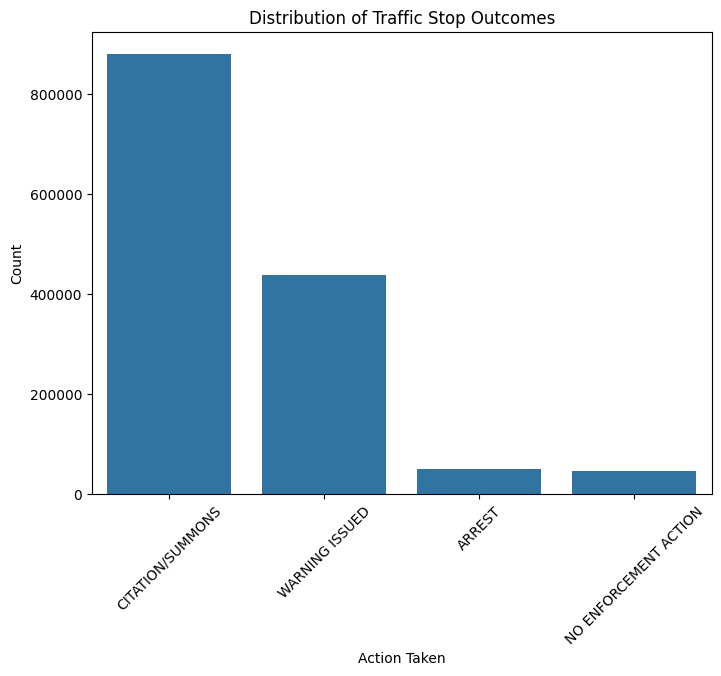

In [13]:
# Distrubtion of Traffic Stop Outcomes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
action_counts = df['ACTION TAKEN'].value_counts()
print(action_counts)


plt.figure(figsize=(8, 6))
sns.countplot(x='ACTION TAKEN', data=df, order=action_counts.index)
plt.title('Distribution of Traffic Stop Outcomes')
plt.xlabel('Action Taken')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


RACE
WHITE                                                 901696
BLACK OR AFRICAN AMERICAN                             418866
UNKNOWN                                                52017
ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER     38617
AMERICAN INDIAN OR ALASKA NATIVE                        4782
Name: count, dtype: int64


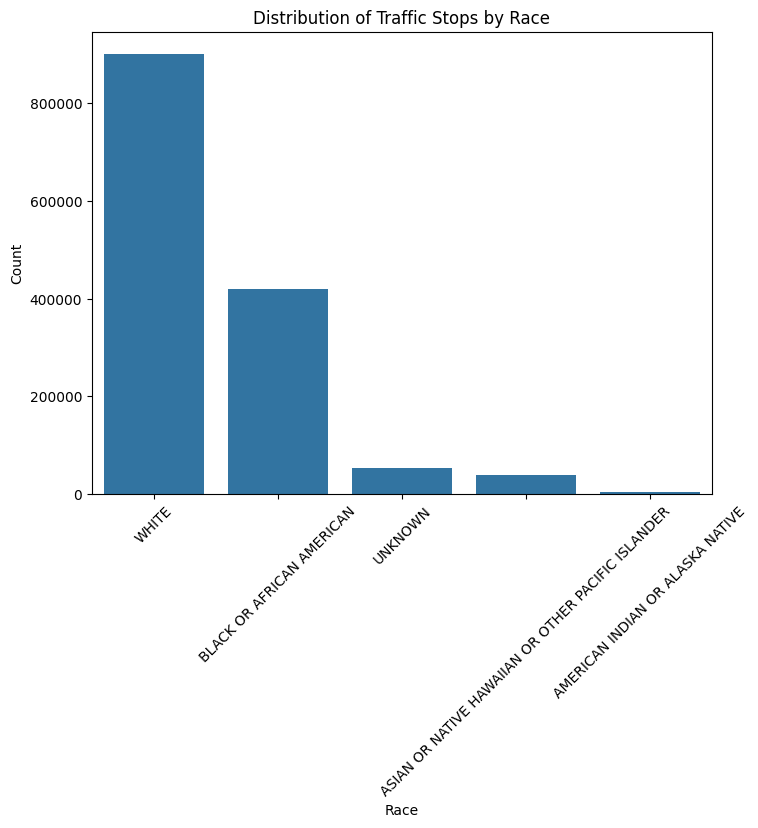

In [14]:
# Distrubtion of Traffic Stops by Race
race_counts = df['RACE'].value_counts()
print(race_counts)


plt.figure(figsize=(8, 6))
sns.countplot(x='RACE', data=df, order=race_counts.index)
plt.title('Distribution of Traffic Stops by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


GENDER
MALE       900103
FEMALE     515057
OTHER         545
UNKNOWN       273
Name: count, dtype: int64


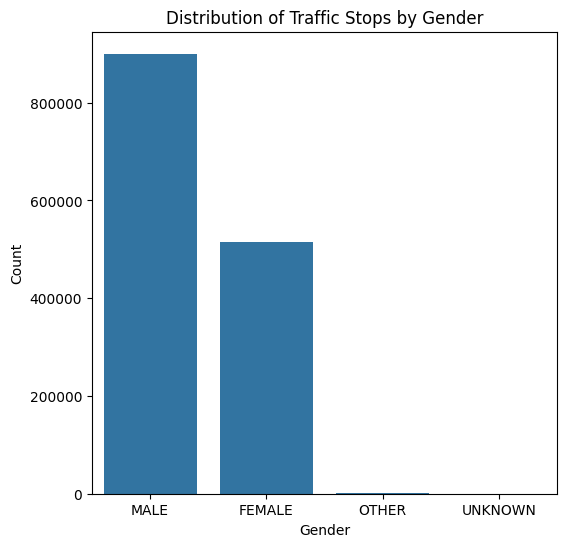

In [15]:
# Distrubtion of Traffic Stops by Gender
gender_counts = df['GENDER'].value_counts()
print(gender_counts)

plt.figure(figsize=(6, 6))
sns.countplot(x='GENDER', data=df, order=gender_counts.index)
plt.title('Distribution of Traffic Stops by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


ACTION TAKEN                                          ARREST  \
RACE                                                           
AMERICAN INDIAN OR ALASKA NATIVE                    1.150146   
ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  3.270580   
BLACK OR AFRICAN AMERICAN                           4.614125   
UNKNOWN                                             0.724763   
WHITE                                               3.145073   

ACTION TAKEN                                        CITATION/SUMMONS  \
RACE                                                                   
AMERICAN INDIAN OR ALASKA NATIVE                           65.830197   
ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER         62.467307   
BLACK OR AFRICAN AMERICAN                                  58.292867   
UNKNOWN                                                    76.359652   
WHITE                                                      63.140127   

ACTION TAKEN                                  

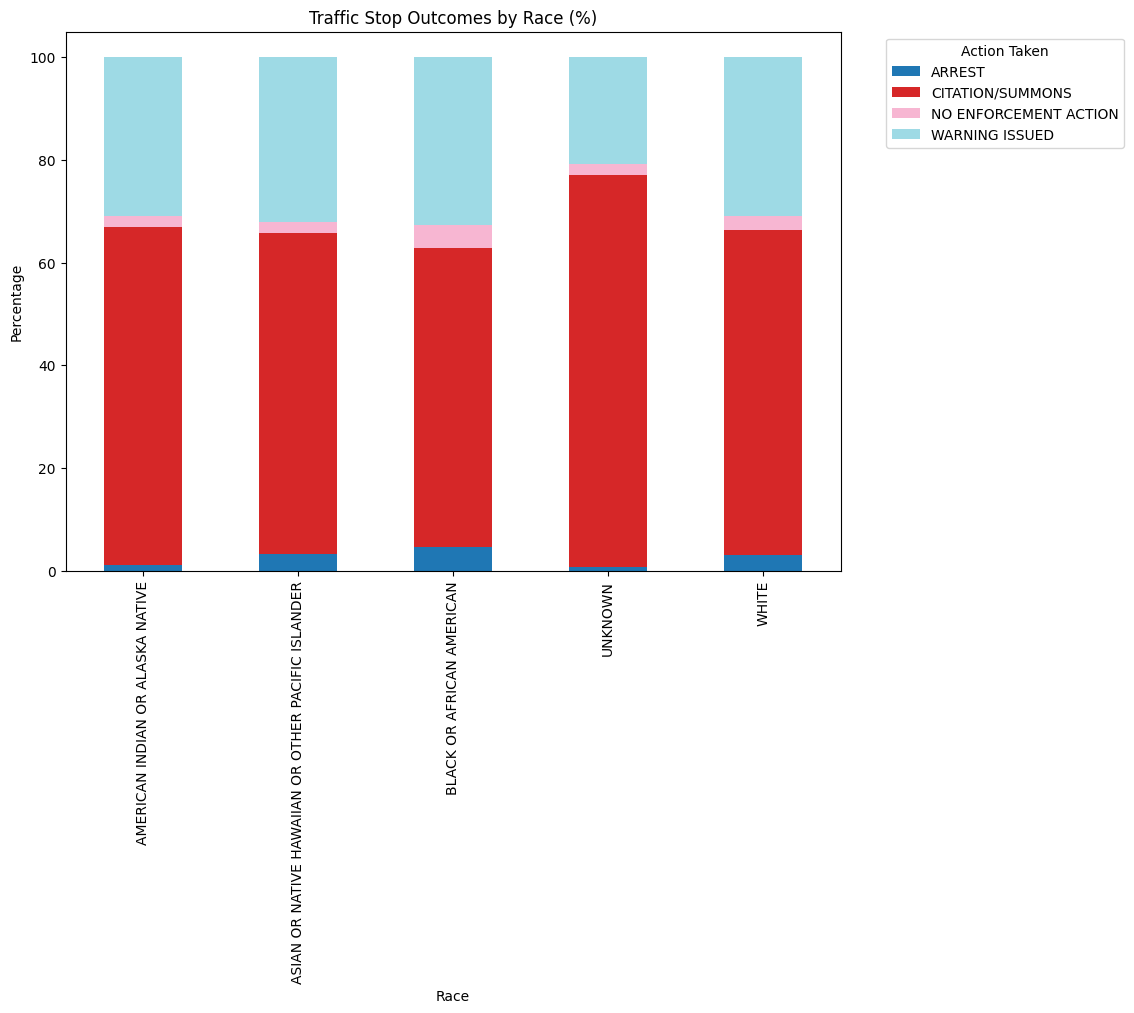

In [16]:
# Cross-tabulation of ACTION TAKEN and RACE
race_action_ct = pd.crosstab(df['RACE'], df['ACTION TAKEN'], normalize='index') * 100
print(race_action_ct)

race_action_ct.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Traffic Stop Outcomes by Race (%)')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ACTION TAKEN    ARREST  CITATION/SUMMONS  NO ENFORCEMENT ACTION  \
GENDER                                                            
FEMALE        2.237228         63.063117               2.992678   
MALE          4.204741         61.688607               3.468936   
OTHER         2.018349         52.477064              14.495413   
UNKNOWN       0.000000         49.084249              22.710623   

ACTION TAKEN  WARNING ISSUED  
GENDER                        
FEMALE             31.706976  
MALE               30.637716  
OTHER              31.009174  
UNKNOWN            28.205128  


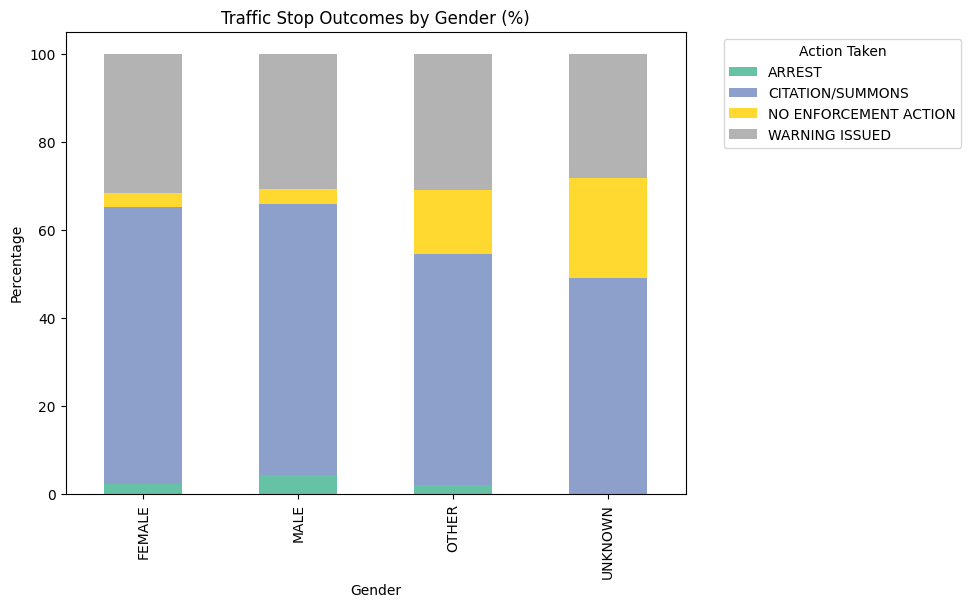

In [17]:
# Cross-tabulation of ACTION TAKEN and GENDER
gender_action_ct = pd.crosstab(df['GENDER'], df['ACTION TAKEN'], normalize='index') * 100
print(gender_action_ct)


gender_action_ct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Traffic Stop Outcomes by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


True
[28. 54. 30. 23. 22. 35. 19. 40. 33. 18. 50. 24. 55. 58. 38. 29. 46. 47.
 44. 42. 81. 20. 27. 63. 31. 21. 25. 62. 34. 80. 66. 39. 41. 61. 43. 36.
 37. 45. 68. 74. 53. 49. 32. 57. 82. 26. 52. 73. 76. 48. 67. 56. 83. 51.
 64. 70. 78. 60. 77. 59. 65. 71. 72. 85. 89. 69. 75. 96. 86. 99. 79. 88.
 87. 84. 90. 93. 95. 94. 91. 92. 98. 97.]
0     28.0
1     54.0
2     30.0
3     23.0
4     22.0
5     35.0
6     19.0
7     40.0
8     33.0
9     18.0
10    30.0
11    50.0
12    24.0
13    55.0
14    24.0
15    58.0
16    55.0
17    38.0
18    29.0
19    19.0
Name: AGE, dtype: float64
AGE
21.0    49503
20.0    48379
22.0    48026
23.0    45338
25.0    43765
        ...  
94.0       47
95.0       31
96.0       30
97.0       24
98.0       11
Name: count, Length: 82, dtype: int64
count    1.415978e+06
mean     3.779464e+01
std      1.485777e+01
min      1.800000e+01
25%      2.500000e+01
50%      3.500000e+01
75%      4.800000e+01
max      9.900000e+01
Name: AGE, dtype: float64


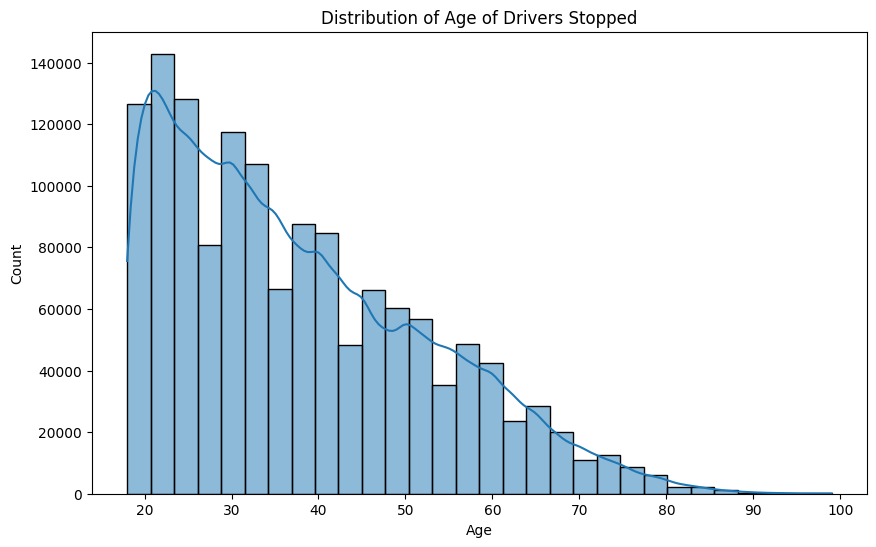

In [18]:
print('AGE' in df.columns)
print(df['AGE'].unique())
print(df['AGE'].head(20))
print(df['AGE'].value_counts())


df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df = df.dropna(subset=['AGE'])
df['AGE'] = df['AGE'].astype(int)


print(df['AGE'].describe())


plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribution of Age of Drivers Stopped')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


AGE_GROUP
18-25    356064
26-35    381263
36-45    277351
46-55    193508
56-65    134838
66+       72954
Name: count, dtype: int64


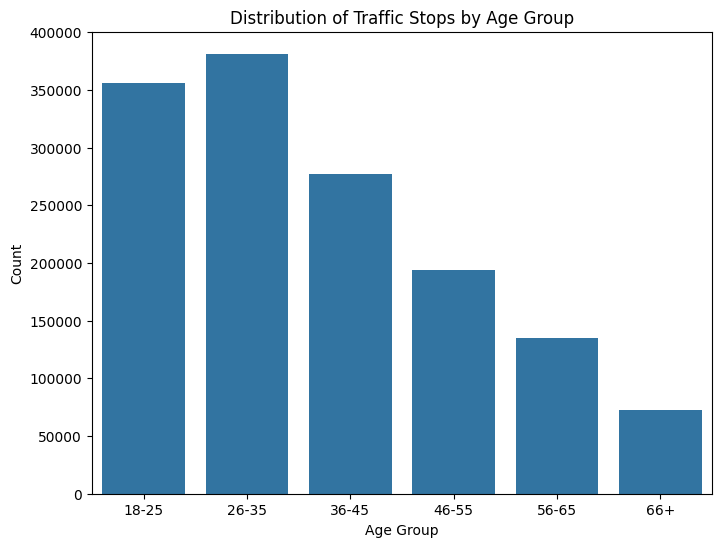

In [19]:
#Distrubtion by age groups
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

age_group_counts = df['AGE_GROUP'].value_counts().sort_index()
print(age_group_counts)


plt.figure(figsize=(8, 6))
sns.countplot(x='AGE_GROUP', data=df, order=labels)
plt.title('Distribution of Traffic Stops by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


ACTION TAKEN    ARREST  CITATION/SUMMONS  NO ENFORCEMENT ACTION  \
AGE_GROUP                                                         
18-25         3.479150         64.513121               3.289858   
26-35         4.301230         63.402166               3.336017   
36-45         3.959243         61.849065               3.335845   
46-55         2.979722         61.060525               3.187465   
56-65         2.264940         59.326006               3.294324   
66+           1.086986         53.958659               3.404885   

ACTION TAKEN  WARNING ISSUED  
AGE_GROUP                     
18-25              28.717871  
26-35              28.960586  
36-45              30.855847  
46-55              32.772288  
56-65              35.114730  
66+                41.549470  


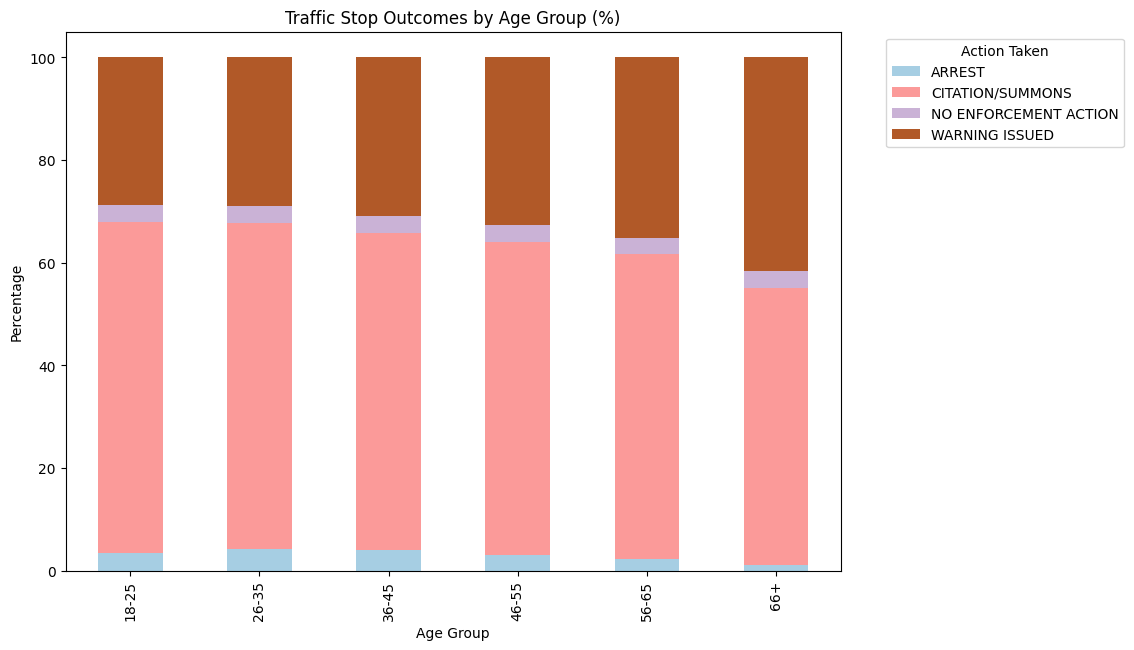

In [20]:
# Cross-tabulation of ACTION TAKEN and AGE_GROUP
age_action_ct = pd.crosstab(df['AGE_GROUP'], df['ACTION TAKEN'], normalize='index') * 100
print(age_action_ct)

age_action_ct.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Paired')
plt.title('Traffic Stop Outcomes by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


REASON FOR STOP
TRAFFIC VIOLATION                1219845
EQUIPMENT VIOLATION               100790
CALLS FOR SERVICE                  45880
OTHER INVESTIGATIVE DETENTION      28134
TERRY STOP                         14614
CHECK POINT                         5008
WARRANT SERVICE                      860
ACCIDENT                             847
Name: count, dtype: int64


<ipython-input-21-8ff182bf55b1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')


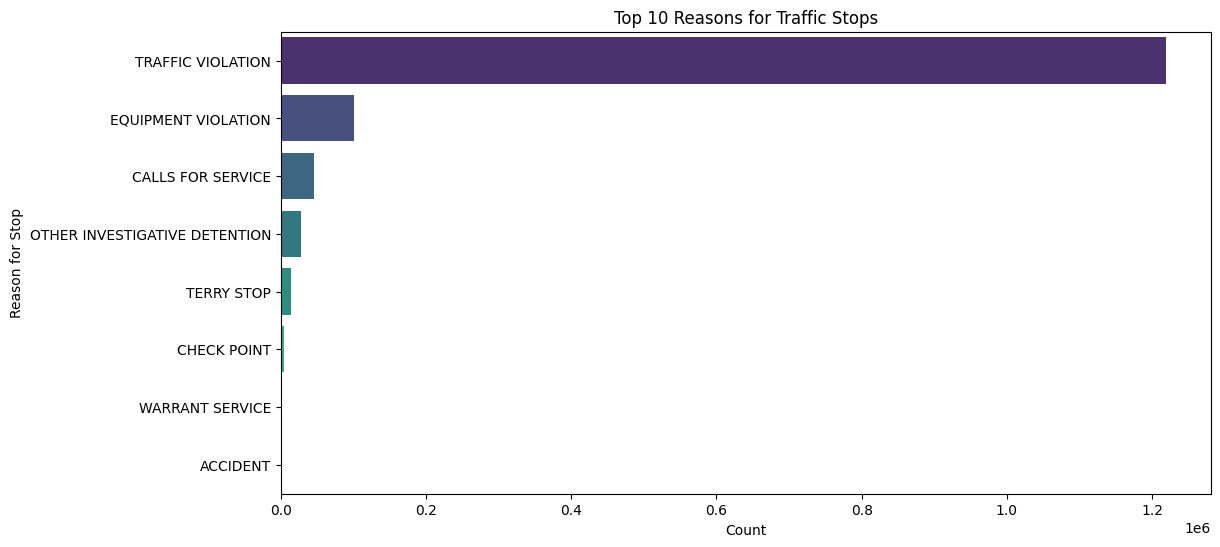

In [21]:
# Count of REASON FOR STOP
reason_counts = df['REASON FOR STOP'].value_counts().head(10)
print(reason_counts)


plt.figure(figsize=(12, 6))
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')
plt.title('Top 10 Reasons for Traffic Stops')
plt.xlabel('Count')
plt.ylabel('Reason for Stop')
plt.show()


ACTION TAKEN                      ARREST  CITATION/SUMMONS  \
REASON FOR STOP                                              
ACCIDENT                       15.820543         72.727273   
CALLS FOR SERVICE              53.158239         24.991282   
CHECK POINT                     3.694089         79.532748   
EQUIPMENT VIOLATION             1.152892         48.841155   
OTHER INVESTIGATIVE DETENTION  10.339802         41.135281   
TERRY STOP                     31.182428         16.059943   
TRAFFIC VIOLATION               1.245404         65.686870   
WARRANT SERVICE                99.186047          0.232558   

ACTION TAKEN                   NO ENFORCEMENT ACTION  WARNING ISSUED  
REASON FOR STOP                                                       
ACCIDENT                                    0.826446       10.625738  
CALLS FOR SERVICE                          13.020924        8.829555  
CHECK POINT                                 5.750799       11.022364  
EQUIPMENT VIOLATION     

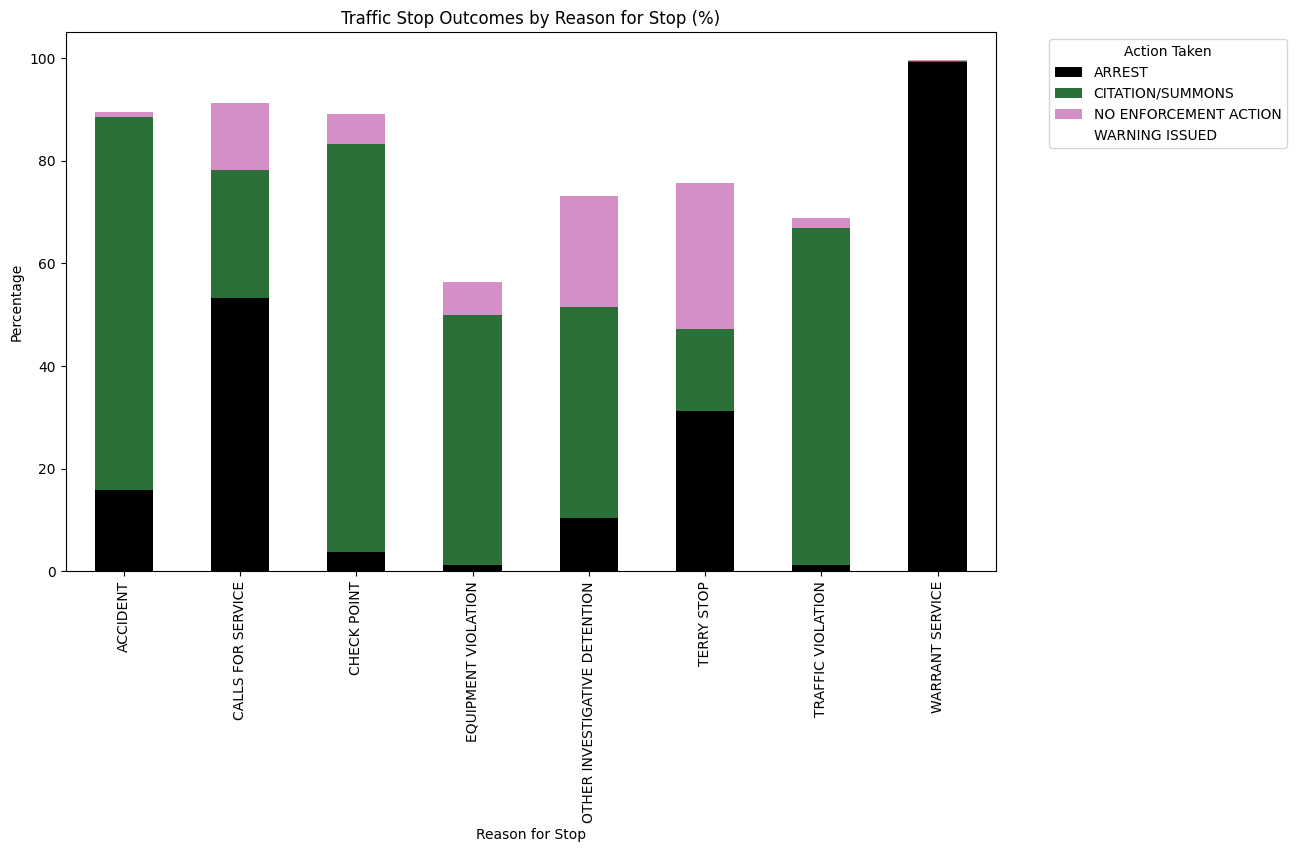

In [22]:
# Cross-tabulation of ACTION TAKEN and REASON FOR STOP for top reasons
top_reasons = reason_counts.index
reason_action_ct = pd.crosstab(df[df['REASON FOR STOP'].isin(top_reasons)]['REASON FOR STOP'], df['ACTION TAKEN'], normalize='index') * 100
print(reason_action_ct)

reason_action_ct.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='cubehelix')
plt.title('Traffic Stop Outcomes by Reason for Stop (%)')
plt.xlabel('Reason for Stop')
plt.ylabel('Percentage')
plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ENGLISH SPEAKING
YES    1369450
NO       46528
Name: count, dtype: int64


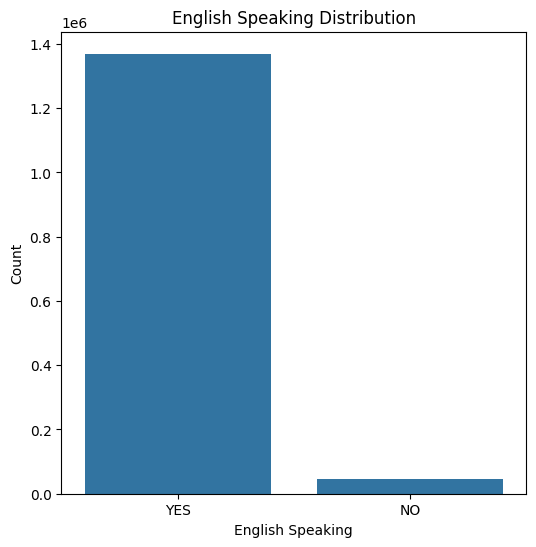

In [23]:
# Count of ENGLISH SPEAKING
english_counts = df['ENGLISH SPEAKING'].value_counts()
print(english_counts)


plt.figure(figsize=(6, 6))
sns.countplot(x='ENGLISH SPEAKING', data=df, order=english_counts.index)
plt.title('English Speaking Distribution')
plt.xlabel('English Speaking')
plt.ylabel('Count')
plt.show()


ACTION TAKEN         ARREST  CITATION/SUMMONS  NO ENFORCEMENT ACTION  \
ENGLISH SPEAKING                                                       
NO                11.249140         57.221458               4.794962   
YES                3.223703         62.351163               3.252985   

ACTION TAKEN      WARNING ISSUED  
ENGLISH SPEAKING                  
NO                     26.734439  
YES                    31.172149  


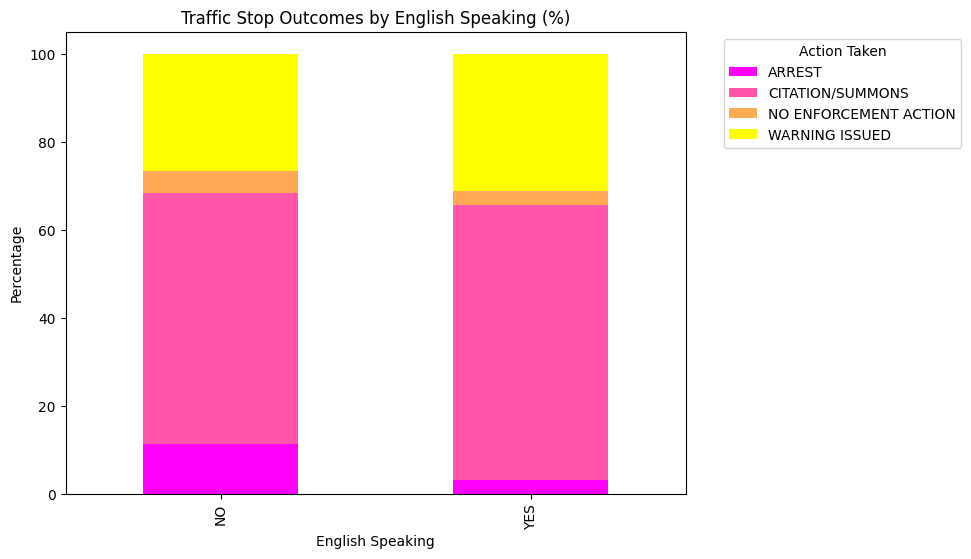

In [24]:
# Cross-tabulation of ACTION TAKEN and ENGLISH SPEAKING
english_action_ct = pd.crosstab(df['ENGLISH SPEAKING'], df['ACTION TAKEN'], normalize='index') * 100
print(english_action_ct)

english_action_ct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='spring')
plt.title('Traffic Stop Outcomes by English Speaking (%)')
plt.xlabel('English Speaking')
plt.ylabel('Percentage')
plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


PERSON TYPE
DRIVER              1366334
OTHER INDIVIDUAL      40154
PASSENGER              9490
Name: count, dtype: int64


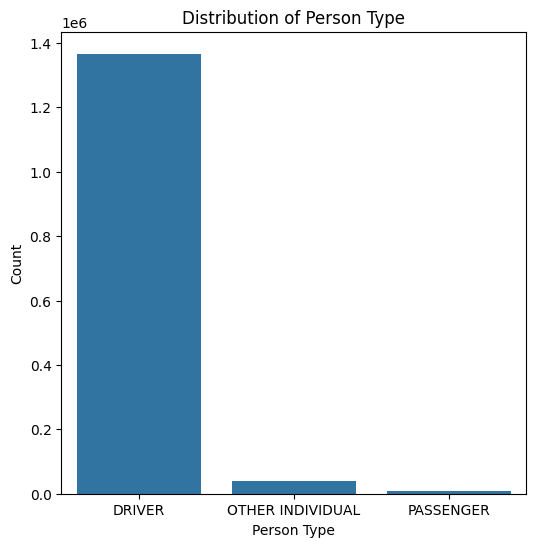

In [25]:
# Count of PERSON TYPE
person_type_counts = df['PERSON TYPE'].value_counts()
print(person_type_counts)

plt.figure(figsize=(6, 6))
sns.countplot(x='PERSON TYPE', data=df, order=person_type_counts.index)
plt.title('Distribution of Person Type')
plt.xlabel('Person Type')
plt.ylabel('Count')
plt.show()


ACTION TAKEN         ARREST  CITATION/SUMMONS  NO ENFORCEMENT ACTION  \
PERSON TYPE                                                            
DRIVER             1.628299         63.884014               2.835032   
OTHER INDIVIDUAL  62.282712         11.958958              13.951288   
PASSENGER         22.381454         29.726027              25.721812   

ACTION TAKEN      WARNING ISSUED  
PERSON TYPE                       
DRIVER                 31.652656  
OTHER INDIVIDUAL       11.807043  
PASSENGER              22.170706  


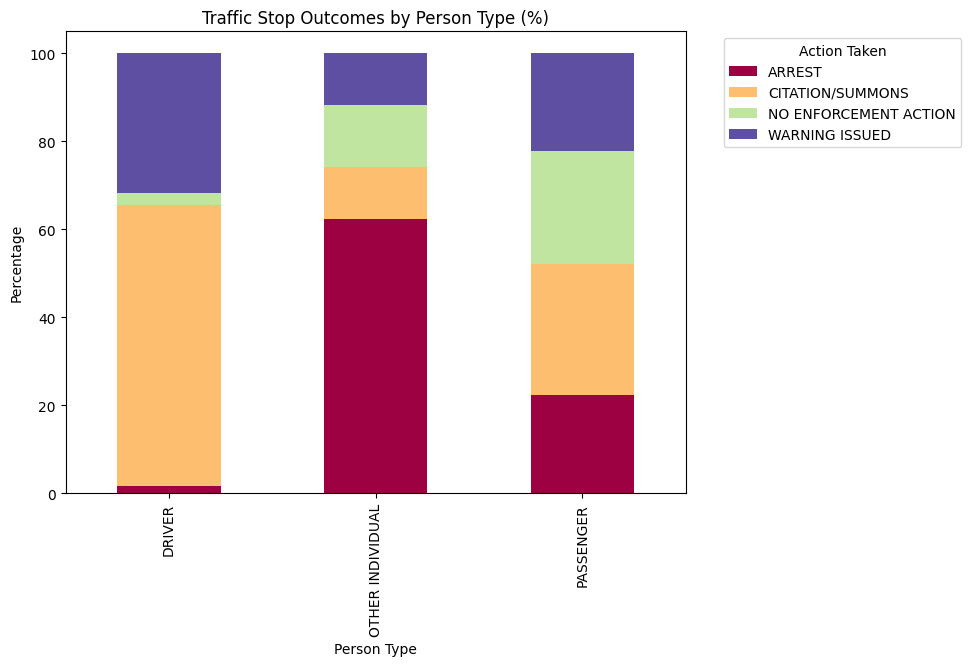

In [26]:
# Cross-tabulation of ACTION TAKEN and PERSON TYPE
person_type_action_ct = pd.crosstab(df['PERSON TYPE'], df['ACTION TAKEN'], normalize='index') * 100
print(person_type_action_ct)

person_type_action_ct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Spectral')
plt.title('Traffic Stop Outcomes by Person Type (%)')
plt.xlabel('Person Type')
plt.ylabel('Percentage')
plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


FORCE USED BY OFFICER                                      NO       YES
RACE                                                                   
AMERICAN INDIAN OR ALASKA NATIVE                    99.749059  0.250941
ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  99.821322  0.178678
BLACK OR AFRICAN AMERICAN                           99.674120  0.325880
UNKNOWN                                             99.882731  0.117269
WHITE                                               99.805478  0.194522


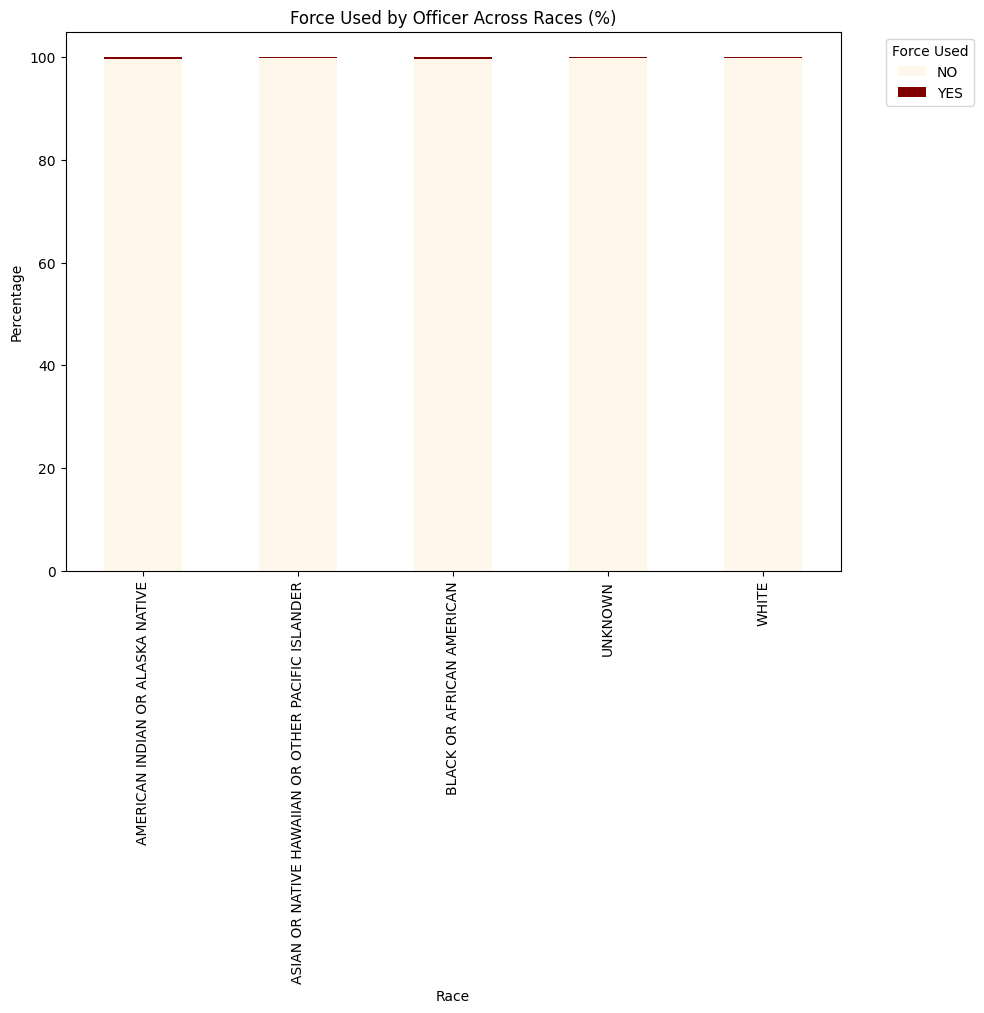

In [27]:
# Cross-tabulation of FORCE USED BY OFFICER and RACE
force_officer_race_ct = pd.crosstab(df['RACE'], df['FORCE USED BY OFFICER'], normalize='index') * 100
print(force_officer_race_ct)


force_officer_race_ct.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='OrRd')
plt.title('Force Used by Officer Across Races (%)')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.legend(title='Force Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


FORCE USED BY OFFICER          NO       YES
GENDER                                     
FEMALE                  99.843707  0.156293
MALE                    99.727253  0.272747
OTHER                   99.816514  0.183486
UNKNOWN                100.000000  0.000000


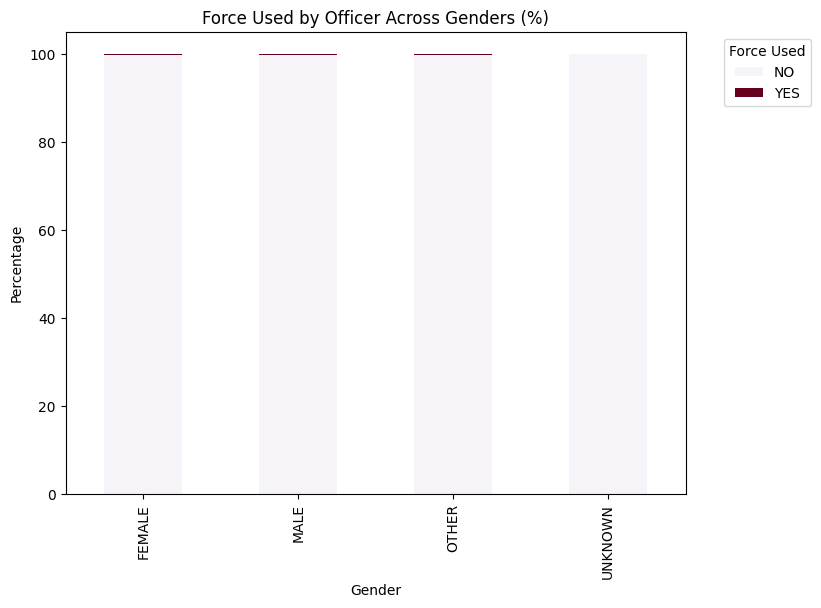

In [28]:
# Cross-tabulation of FORCE USED BY OFFICER and GENDER
force_officer_gender_ct = pd.crosstab(df['GENDER'], df['FORCE USED BY OFFICER'], normalize='index') * 100
print(force_officer_gender_ct)

force_officer_gender_ct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='PuRd')
plt.title('Force Used by Officer Across Genders (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Force Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-30-e10f051526cd>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['AGE'].fillna(median_age, inplace=True)
<ipython-input-30-e10f051526cd>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Non-numeric columns detected: ['AGE_GROUP']


<ipython-input-30-e10f051526cd>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_encoded[col] = pd.to_numeric(X_train_encoded[col], errors='coerce')
<ipython-input-30-e10f051526cd>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_encoded[col] = pd.to_numeric(X_test_encoded[col], errors='coerce')
<ipython-input-30-e10f051526cd>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Accuracy: 0.56

Classification Report:
                       precision    recall  f1-score   support

               ARREST       0.62      0.87      0.72      9962
     CITATION/SUMMONS       0.78      0.55      0.64    175957
NO ENFORCEMENT ACTION       0.16      0.69      0.26      9222
       WARNING ISSUED       0.44      0.53      0.48     88055

             accuracy                           0.56    283196
            macro avg       0.50      0.66      0.53    283196
         weighted avg       0.65      0.56      0.58    283196


Confusion Matrix:
                       ARREST  CITATION/SUMMONS  NO ENFORCEMENT ACTION  \
ARREST                   8638               556                    475   
CITATION/SUMMONS         3392             96506                  19564   
NO ENFORCEMENT ACTION     639               810                   6401   
WARNING ISSUED           1282             26507                  13924   

                       WARNING ISSUED  
ARREST                  

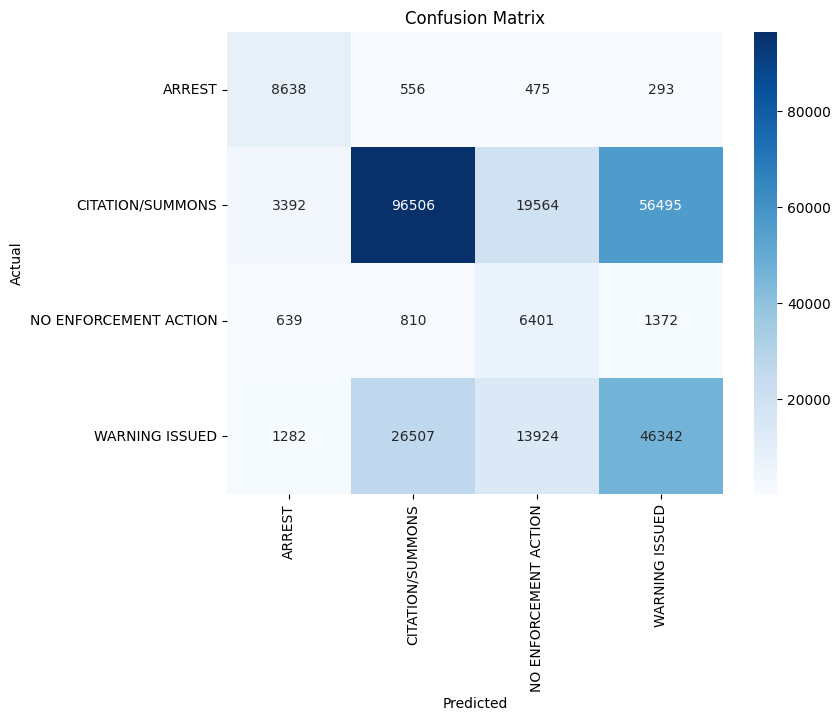


Coefficients:
                             ARREST  CITATION/SUMMONS  NO ENFORCEMENT ACTION  \
AGE                       -0.127359         -0.074000               0.099540   
JURISDICTION_ALBEMARLE CO -0.846856          0.562191              -0.620066   
JURISDICTION_ALEXANDRIA   -0.515462         -0.513895               0.409248   
JURISDICTION_ALLEGHANY CO -0.310815          0.027489               0.260608   
JURISDICTION_AMELIA CO    -0.022388         -0.205283               0.034263   
...                             ...               ...                    ...   
ENGLISH SPEAKING_YES      -0.598106          0.250384               0.019130   
PERSON SEARCHED_YES        4.004094         -1.507141              -0.789516   
VEHICLE SEARCHED_YES       0.335259         -0.388786               0.214373   
FORCE USED BY OFFICER_YES  0.763842         -0.356193              -0.053386   
FORCE USED BY SUBJECT_YES  0.764597         -0.255973              -0.242453   

                        

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


df = df[df['ACTION TAKEN'].notna()]
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)


train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_set.drop(columns=['ACTION TAKEN'])
X_test = test_set.drop(columns=['ACTION TAKEN'])
y_train = train_set['ACTION TAKEN']
y_test = test_set['ACTION TAKEN']


numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()


if 'AGE' in X_train.columns:
    if 'AGE' in numerical_cols:

        age_numeric = pd.to_numeric(X_train['AGE'], errors='coerce')
        if age_numeric.isnull().any():

            numerical_cols.remove('AGE')
            categorical_cols.append('AGE')
        else:
            X_train['AGE'] = age_numeric
            X_test['AGE'] = pd.to_numeric(X_test['AGE'], errors='coerce')

            median_age = age_numeric.median()
            X_train['AGE'].fillna(median_age, inplace=True)
            X_test['AGE'].fillna(median_age, inplace=True)
    else:

        if 'AGE' not in categorical_cols:
            categorical_cols.append('AGE')

X_combined = pd.concat([X_train, X_test], keys=['train', 'test'])


for col in categorical_cols:
    X_combined[col] = X_combined[col].astype(str)


X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_cols, drop_first=True)


X_train_encoded = X_combined_encoded.loc['train']
X_test_encoded = X_combined_encoded.loc['test']


scaler = StandardScaler()
if numerical_cols:
    X_train_encoded.loc[:, numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
    X_test_encoded.loc[:, numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])


non_numeric_columns = X_train_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric_columns:
    print("Non-numeric columns detected:", non_numeric_columns)

    for col in non_numeric_columns:
        X_train_encoded[col] = pd.to_numeric(X_train_encoded[col], errors='coerce')
        X_test_encoded[col] = pd.to_numeric(X_test_encoded[col], errors='coerce')

    X_train_encoded.dropna(axis=1, inplace=True)
    X_test_encoded.dropna(axis=1, inplace=True)


X_train_encoded.fillna(0, inplace=True)
X_test_encoded.fillna(0, inplace=True)


log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight='balanced')
log_reg.fit(X_train_encoded, y_train)


y_pred = log_reg.predict(X_test_encoded)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=log_reg.classes_, columns=log_reg.classes_)
print(cm_df)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


feature_names = X_train_encoded.columns
coefficients = log_reg.coef_
coeff_df = pd.DataFrame(coefficients.T, index=feature_names, columns=log_reg.classes_)
print("\nCoefficients:")
print(coeff_df)

for class_label in coeff_df.columns:
    print(f"\nTop features influencing '{class_label}':")
    top_features = coeff_df[class_label].abs().sort_values(ascending=False).head(10)
    print(top_features)


In [ ]:
!pip install kmodes

Decision Tree Accuracy: 0.66

Decision Tree Classification Report:
                       precision    recall  f1-score   support

               ARREST       0.79      0.75      0.77      9962
     CITATION/SUMMONS       0.69      0.88      0.77    175957
NO ENFORCEMENT ACTION       0.42      0.21      0.28      9222
       WARNING ISSUED       0.52      0.26      0.35     88055

             accuracy                           0.66    283196
            macro avg       0.60      0.53      0.54    283196
         weighted avg       0.63      0.66      0.63    283196



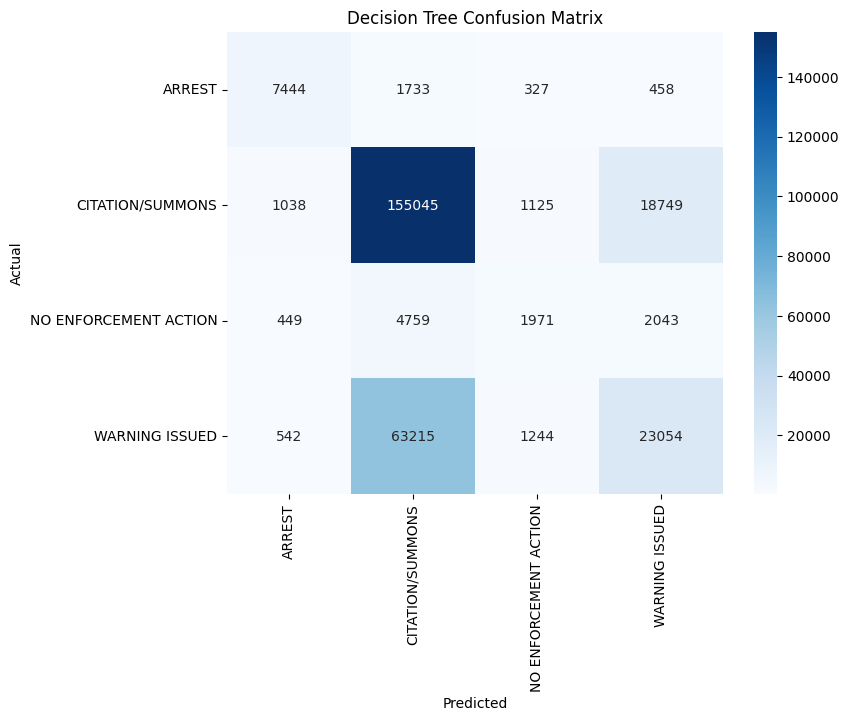

Top 10 Feature Importances in Decision Tree:
AGE                                  0.207520
PERSON SEARCHED_YES                  0.150737
PERSON TYPE_OTHER INDIVIDUAL         0.048954
JURISDICTION_FAIRFAX CO              0.037849
GENDER_MALE                          0.035063
REASON FOR STOP_TRAFFIC VIOLATION    0.025903
JURISDICTION_CARROLL CO              0.020859
JURISDICTION_BRUNSWICK CO            0.020538
ENGLISH SPEAKING_YES                 0.018967
JURISDICTION_CHESAPEAKE              0.018005
dtype: float64


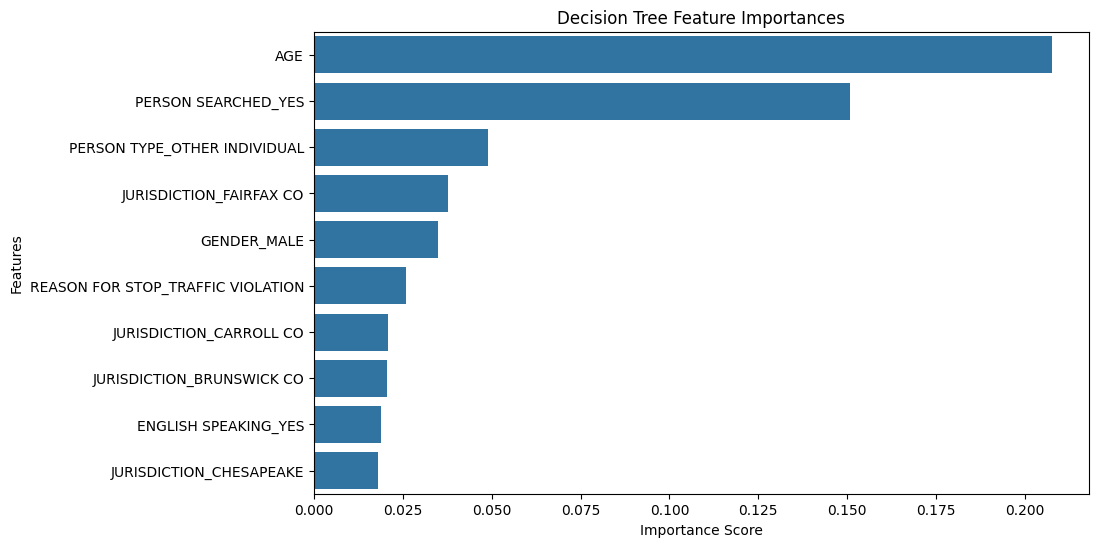

In [31]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train)


y_pred_dt = dt_classifier.predict(X_test_encoded)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt_df = pd.DataFrame(cm_dt, index=dt_classifier.classes_, columns=dt_classifier.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()


feature_names = X_train_encoded.columns
feature_importances_dt = pd.Series(dt_classifier.feature_importances_, index=feature_names)
feature_importances_dt = feature_importances_dt.sort_values(ascending=False)
print("Top 10 Feature Importances in Decision Tree:")
print(feature_importances_dt.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances_dt.head(10), y=feature_importances_dt.head(10).index)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



Random Forest Accuracy: 0.66

Random Forest Classification Report:
                       precision    recall  f1-score   support

               ARREST       0.81      0.75      0.78      9962
     CITATION/SUMMONS       0.69      0.87      0.77    175957
NO ENFORCEMENT ACTION       0.45      0.22      0.30      9222
       WARNING ISSUED       0.52      0.29      0.37     88055

             accuracy                           0.66    283196
            macro avg       0.62      0.53      0.55    283196
         weighted avg       0.64      0.66      0.63    283196



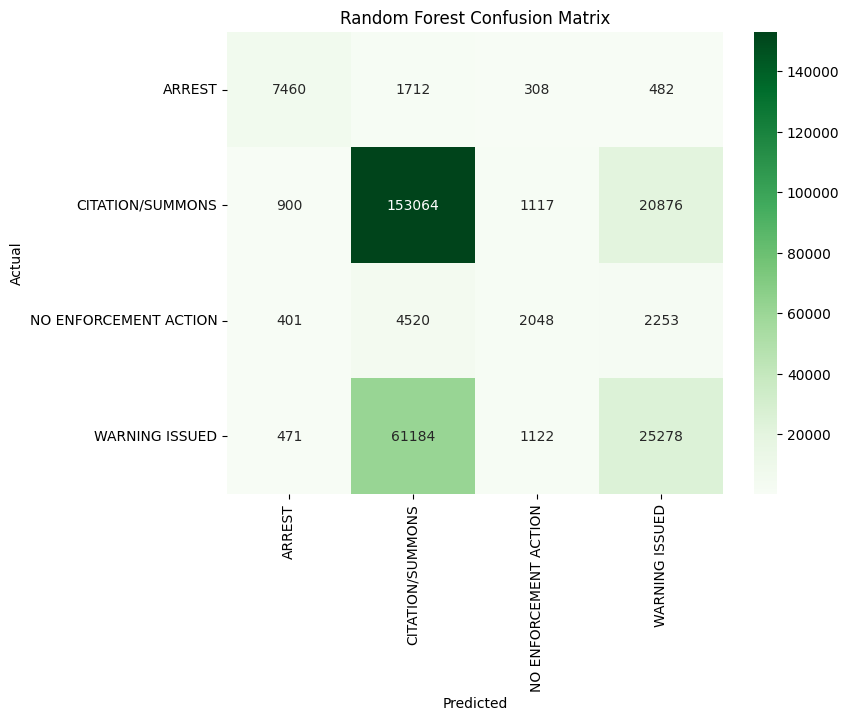

Top 10 Feature Importances in Random Forest:
AGE                                  0.309875
PERSON SEARCHED_YES                  0.078437
PERSON TYPE_OTHER INDIVIDUAL         0.047464
REASON FOR STOP_TRAFFIC VIOLATION    0.035876
REASON FOR STOP_CALLS FOR SERVICE    0.030649
GENDER_MALE                          0.023332
JURISDICTION_FAIRFAX CO              0.020899
JURISDICTION_CARROLL CO              0.019269
JURISDICTION_BRUNSWICK CO            0.017437
JURISDICTION_CHESAPEAKE              0.017038
dtype: float64


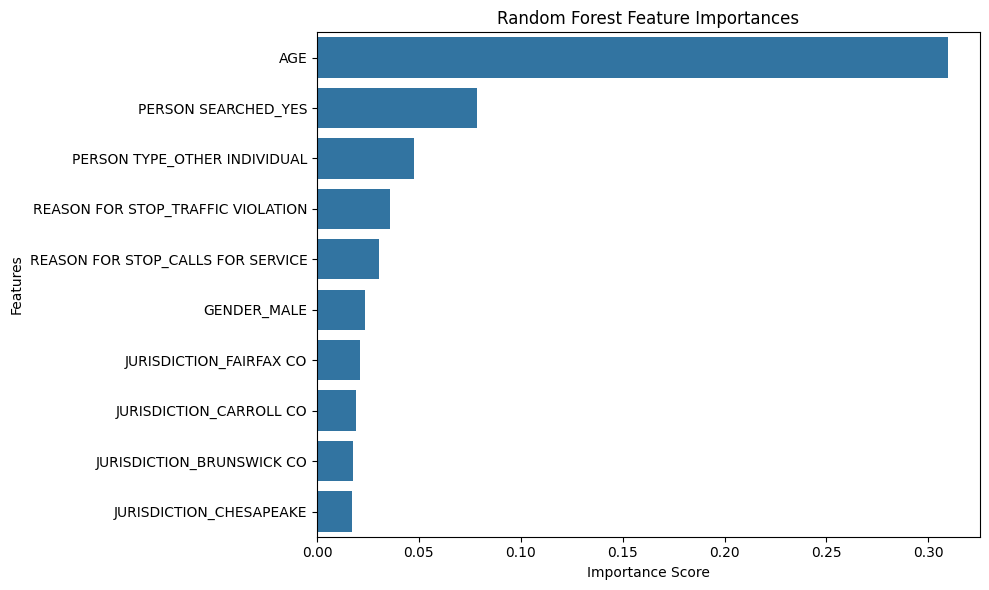

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)


rf_classifier.fit(X_train_encoded, y_train)


y_pred_rf = rf_classifier.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_df = pd.DataFrame(cm_rf, index=rf_classifier.classes_, columns=rf_classifier.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_df, annot=True, fmt='d', cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()


feature_importances_rf = pd.Series(rf_classifier.feature_importances_, index=X_train_encoded.columns)
feature_importances_rf = feature_importances_rf.sort_values(ascending=False)

print("Top 10 Feature Importances in Random Forest:")
print(feature_importances_rf.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf.head(10), y=feature_importances_rf.head(10).index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    273320
           1       0.85      0.70      0.77      9876

    accuracy                           0.99    283196
   macro avg       0.92      0.85      0.88    283196
weighted avg       0.98      0.99      0.98    283196



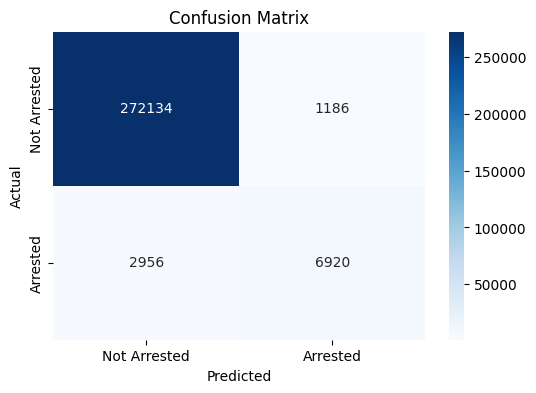


Top 10 Features Influencing Arrest Outcome:
                                Feature  Coefficient  Abs_Coefficient
18                  PERSON SEARCHED_YES     0.963820         0.963820
2        RACE_BLACK OR AFRICAN AMERICAN     0.634513         0.634513
59              JURISDICTION_FAIRFAX CO     0.618537         0.618537
98           JURISDICTION_MANASSAS PARK    -0.584454         0.584454
28            JURISDICTION_ARLINGTON CO    -0.558289         0.558289
4                            RACE_WHITE     0.547658         0.547658
13    REASON FOR STOP_TRAFFIC VIOLATION    -0.386524         0.386524
15         PERSON TYPE_OTHER INDIVIDUAL     0.385813         0.385813
10  REASON FOR STOP_EQUIPMENT VIOLATION    -0.379446         0.379446
22            JURISDICTION_ALBEMARLE CO    -0.323792         0.323792

Odds Ratios for Race Categories:
                                             Feature  Odds_Ratio
1  RACE_ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC...    1.132120
2                    

<ipython-input-53-71176839b502>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_coefficients['Odds_Ratio'] = np.exp(race_coefficients['Coefficient'])


         Current function value: 0.047344
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         Arrest_Outcome   No. Observations:              1132782
Model:                          Logit   Df Residuals:                  1132626
Method:                           MLE   Df Model:                          155
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.6871
Time:                        17:45:28   Log-Likelihood:                -53631.
converged:                      False   LL-Null:                   -1.7139e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7442    105.958     -0.054      0.957    -213.419     201.930
x1            -0.1408      0.010    -14.395      0.000      -0.160      -0.122
x2             0.1305      0.040      3.290      0.0

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna(subset=['ACTION TAKEN', 'RACE'])

def categorize_action(action):
    if 'ARREST' in action.upper():
        return 'Arrested'
    else:
        return 'Not Arrested'


df['Arrest_Outcome'] = df['ACTION TAKEN'].apply(categorize_action)


df['AGE'] = df['AGE'].astype(str)
def handle_age_ranges(age):
    if '-' in age:
        try:
            start, end = map(int, age.split('-'))
            return (start + end) / 2
        except ValueError:
            return np.nan
    else:
        try:
            return float(age)
        except ValueError:
            return np.nan

df['AGE'] = df['AGE'].apply(handle_age_ranges)
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
median_age = df['AGE'].median()
df['AGE'] = df['AGE'].fillna(median_age)

if 'AGE_GROUP' in df.columns:
    pass

categorical_vars = ['RACE', 'GENDER', 'REASON FOR STOP', 'PERSON TYPE',
                    'ENGLISH SPEAKING', 'PERSON SEARCHED', 'VEHICLE SEARCHED',
                    'FORCE USED BY OFFICER', 'FORCE USED BY SUBJECT', 'JURISDICTION']


df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)



y = df_encoded['Arrest_Outcome'].map({'Arrested': 1, 'Not Arrested': 0})

X = df_encoded.drop(['ACTION TAKEN', 'Arrest_Outcome'], axis=1)


if 'AGE_GROUP' in X.columns:
    X = X.drop('AGE_GROUP', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Arrested', 'Arrested'],
            yticklabels=['Not Arrested', 'Arrested'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

feature_names = X.columns
coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 10 Features Influencing Arrest Outcome:")
print(coef_df_sorted.head(10))

race_coefficients = coef_df[coef_df['Feature'].str.contains('RACE_')]
race_coefficients['Odds_Ratio'] = np.exp(race_coefficients['Coefficient'])

print("\nOdds Ratios for Race Categories:")
print(race_coefficients[['Feature', 'Odds_Ratio']])

X_train_sm = sm.add_constant(X_train_scaled)
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()
print(result.summary())


<ipython-input-38-417dbcb0183f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index, palette='Blues_r')


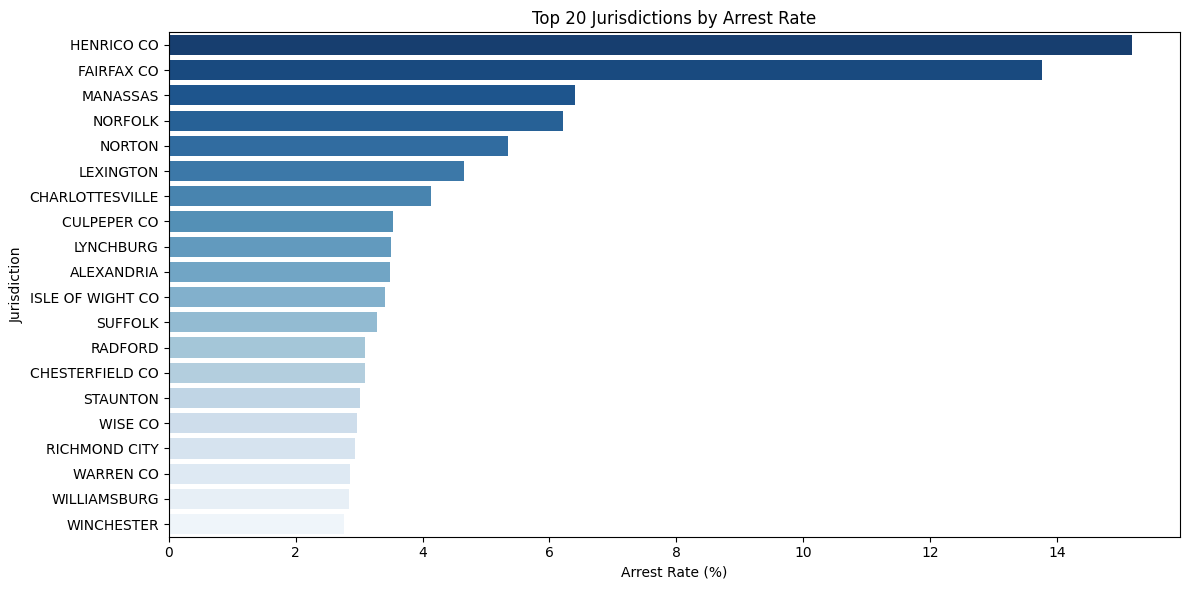

<ipython-input-38-417dbcb0183f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_20.values, y=bottom_20.index, palette='Greens_r')


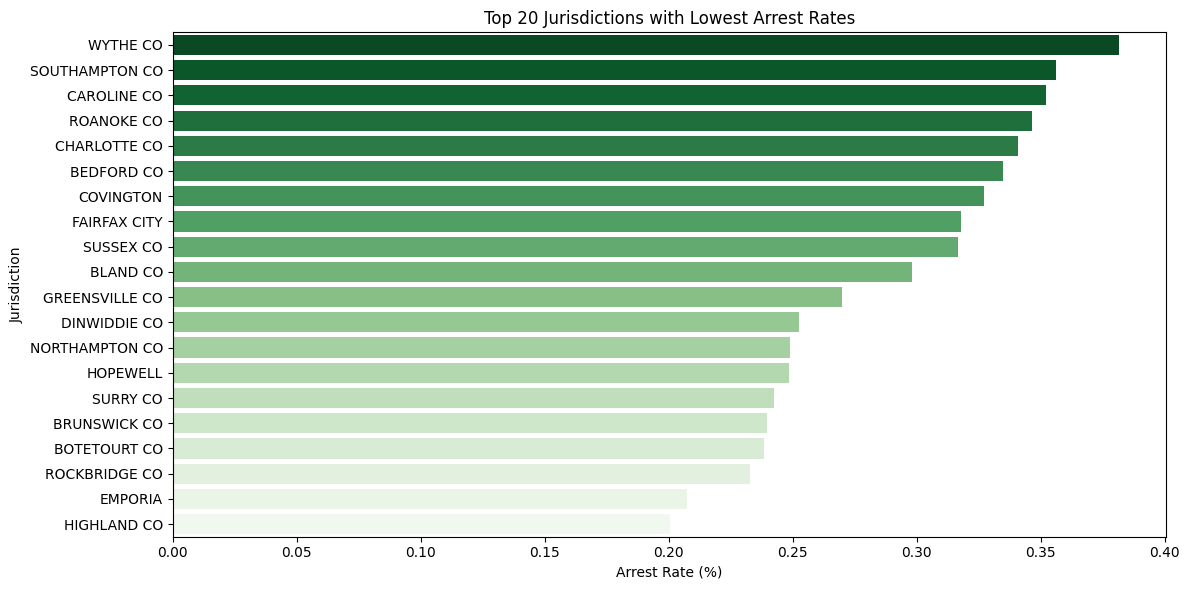

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_filtered = df[df['JURISDICTION'].notna() & df['ACTION TAKEN'].notna()]


arrest_counts = df_filtered[df_filtered['ACTION TAKEN'] == 'ARREST']['JURISDICTION'].value_counts()
total_counts = df_filtered['JURISDICTION'].value_counts()
arrest_rates = (arrest_counts / total_counts) * 100


arrest_rates = arrest_rates.dropna().sort_values(ascending=False)


top_20 = arrest_rates.head(20)
bottom_20 = arrest_rates.tail(20)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_20.values, y=top_20.index, palette='Blues_r')
plt.title('Top 20 Jurisdictions by Arrest Rate')
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Jurisdiction')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_20.values, y=bottom_20.index, palette='Greens_r')
plt.title('Top 20 Jurisdictions with Lowest Arrest Rates')
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Jurisdiction')
plt.tight_layout()
plt.show()


In [43]:

selected_counties = [
    'HENRICO CO',
    'FAIRFAX CO',
    'MANASSAS',
    'NORFOLK',
    'NORTON',
    'LEXINGTON',
    'CHARLOTTESVILLE',
    'CULPEPER CO',
    'LYNCHBURG'
]


def categorize_action(action):
    if 'ARREST' in action.upper():
        return 'Arrested'
    else:
        return 'Not Arrested'

df['Arrest_Outcome'] = df['ACTION TAKEN'].apply(categorize_action)


df_selected = df[df['JURISDICTION'].isin(selected_counties)]


In [45]:
import pandas as pd

racial_groups = df_selected['RACE'].unique()


all_data = []

for county in selected_counties:
    for race in racial_groups:
        df_subset = df_selected[(df_selected['JURISDICTION'] == county) & (df_selected['RACE'] == race)]
        total_stops = len(df_subset)
        total_arrests = sum(df_subset['Arrest_Outcome'] == 'Arrested')
        if total_stops > 0:
            arrest_rate = (total_arrests / total_stops) * 100

            all_data.append({
                'County': county,
                'Race': race,
                'Arrest_Rate': arrest_rate,
                'Total_Stops': total_stops,
                'Total_Arrests': total_arrests
            })


arrest_rates_by_race = pd.DataFrame(all_data)

In [46]:
from scipy.stats import chi2_contingency

for county in selected_counties:
    df_county = df_selected[df_selected['JURISDICTION'] == county]
    contingency_table = pd.crosstab(df_county['RACE'], df_county['Arrest_Outcome'])

    if contingency_table.values.min() >= 5:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"\nCounty: {county}")
        print("Chi-Square Statistic:", chi2)
        print("P-value:", p)
        if p < 0.05:
            print("There is a significant association between race and arrest outcome.")
        else:
            print("No significant association between race and arrest outcome.")
    else:
        print(f"\nCounty: {county}")
        print("Not enough data to perform Chi-Square test reliably (expected frequencies too low).")



County: HENRICO CO
Not enough data to perform Chi-Square test reliably (expected frequencies too low).

County: FAIRFAX CO
Chi-Square Statistic: 4975.672773698263
P-value: 0.0
There is a significant association between race and arrest outcome.

County: MANASSAS
Not enough data to perform Chi-Square test reliably (expected frequencies too low).

County: NORFOLK
Not enough data to perform Chi-Square test reliably (expected frequencies too low).

County: NORTON
Not enough data to perform Chi-Square test reliably (expected frequencies too low).

County: LEXINGTON
Not enough data to perform Chi-Square test reliably (expected frequencies too low).

County: CHARLOTTESVILLE
Not enough data to perform Chi-Square test reliably (expected frequencies too low).

County: CULPEPER CO
Not enough data to perform Chi-Square test reliably (expected frequencies too low).

County: LYNCHBURG
Not enough data to perform Chi-Square test reliably (expected frequencies too low).


<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


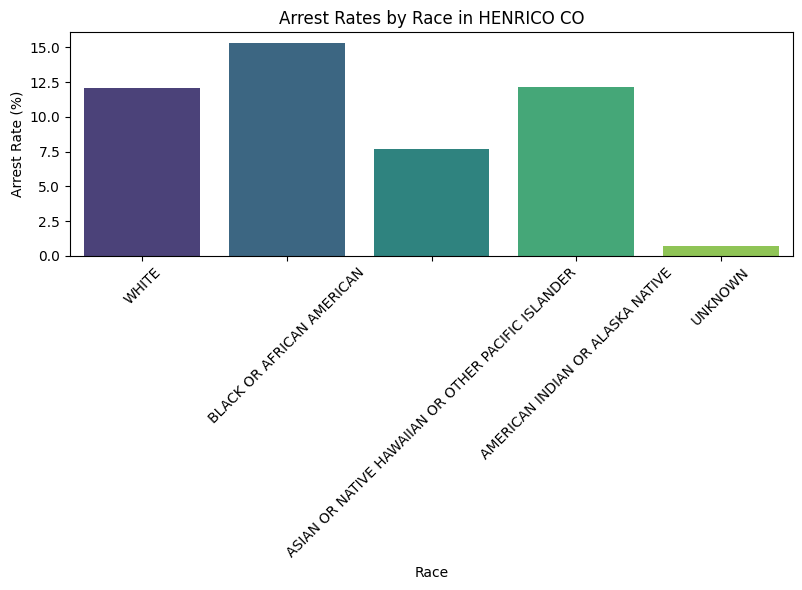

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


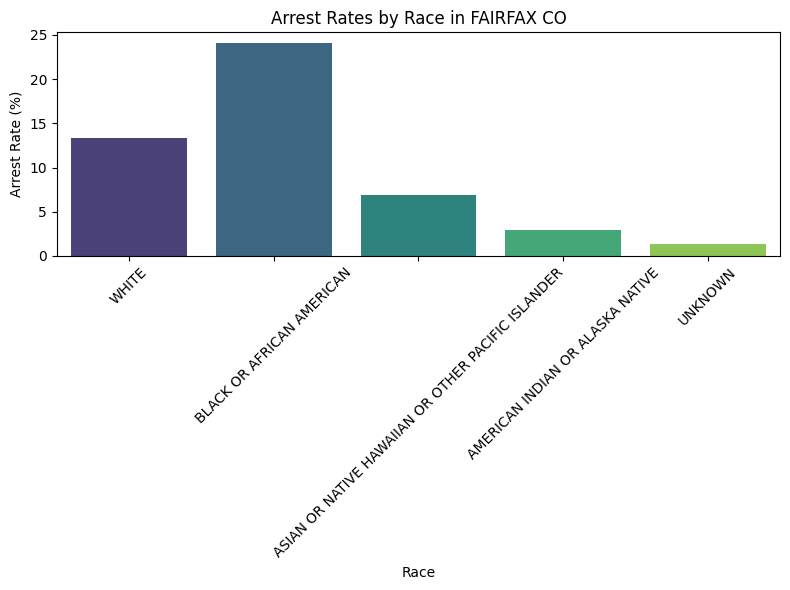

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


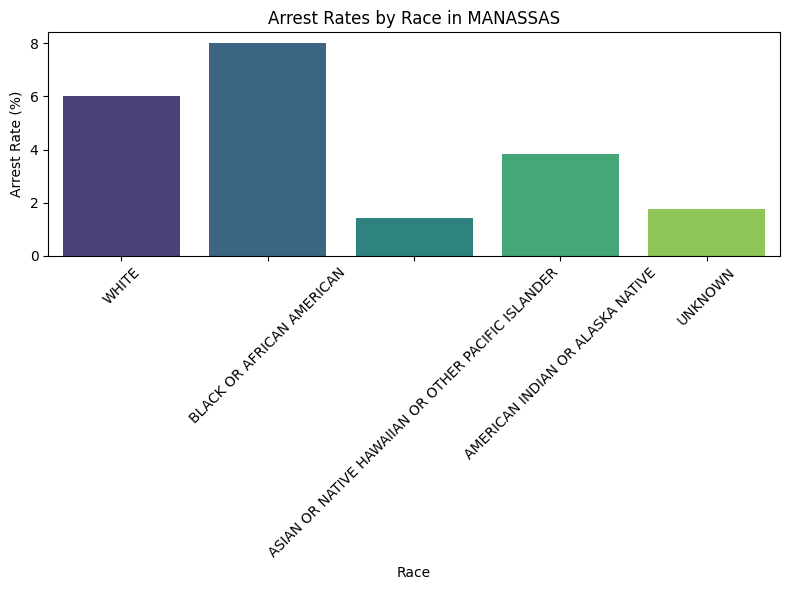

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


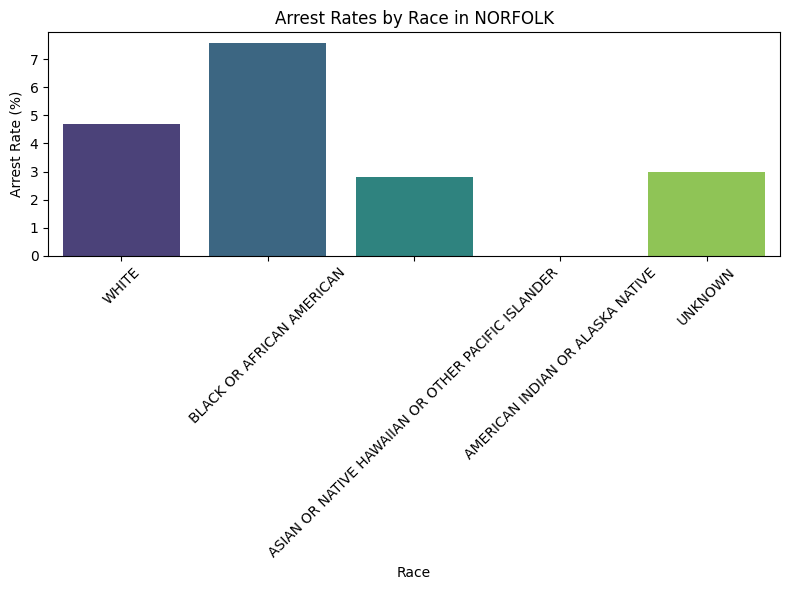

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


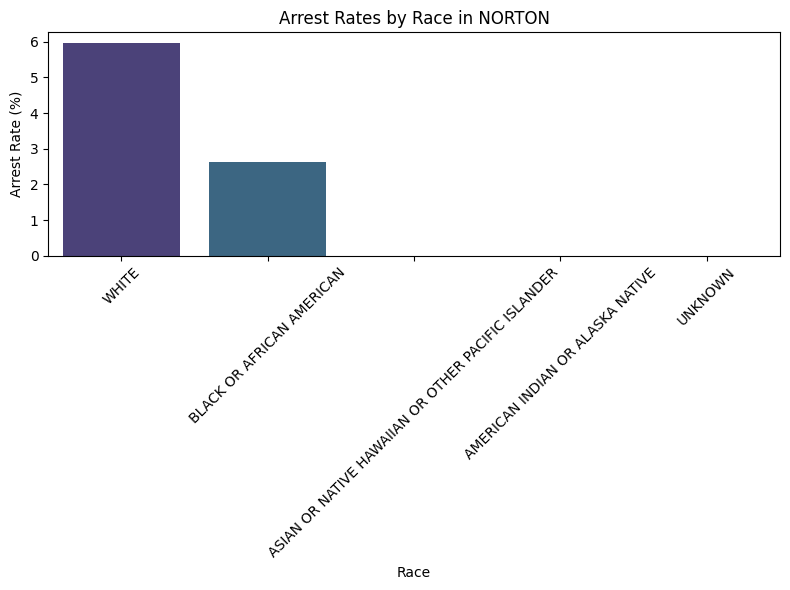

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


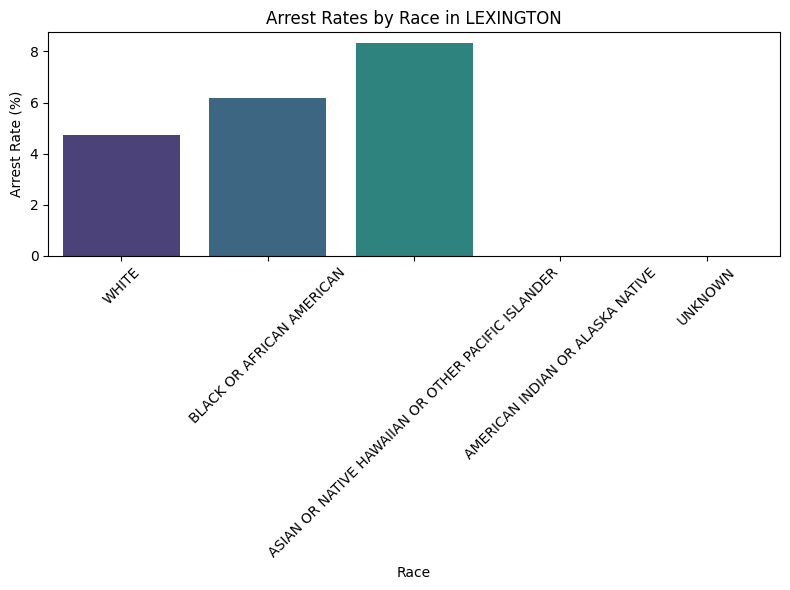

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


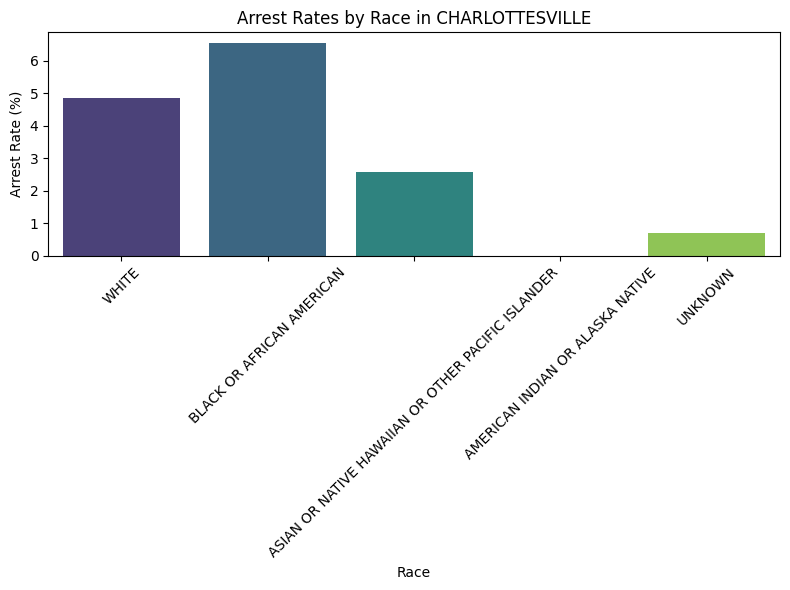

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


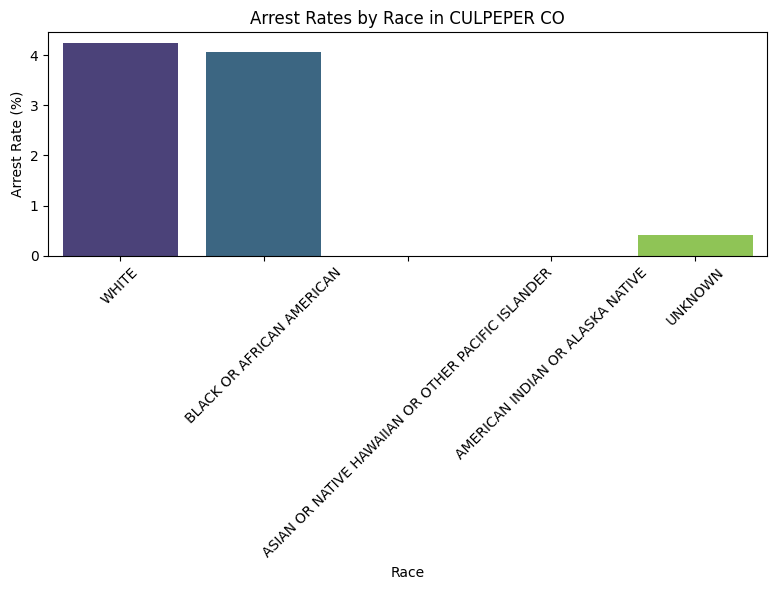

<ipython-input-47-a6f181f665c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')


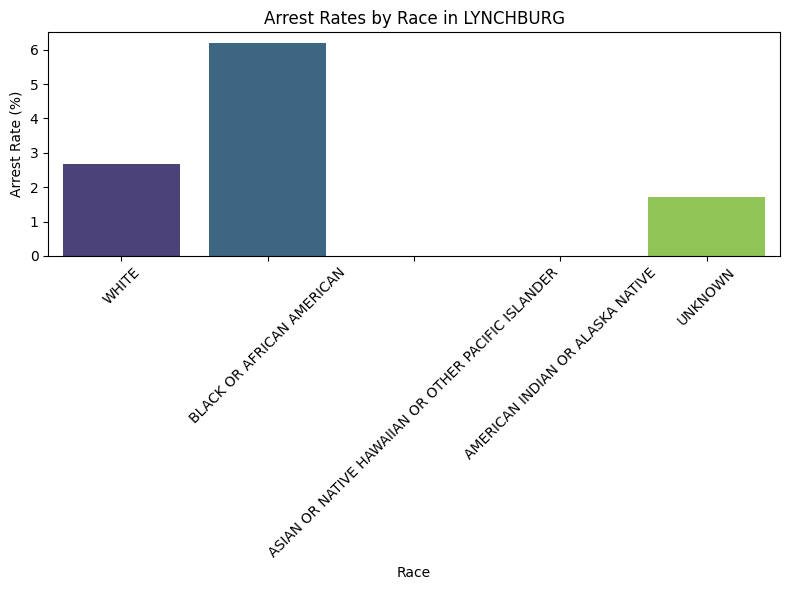

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

for county in selected_counties:
    df_county = arrest_rates_by_race[arrest_rates_by_race['County'] == county]
    if not df_county.empty:
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Race', y='Arrest_Rate', data=df_county, palette='viridis')
        plt.title(f'Arrest Rates by Race in {county}')
        plt.xlabel('Race')
        plt.ylabel('Arrest Rate (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {county} to visualize.")
